In [ ]:
"""
🔹 CELLULE 1 – Simulation des données (X, Y) avec Numba pour acceleration CPU/GPU
"""
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange

N = 1_000_000
X = np.random.uniform(10, 30, N)
eps = np.random.normal(0, 0.5, N)

@jit(nopython=True, parallel=True)
def compute_Y(X, eps):
    Y = np.empty_like(X)
    for i in prange(X.shape[0]):
        Y[i] = 37 + 0.1 * (X[i] - 20) + eps[i]
    return Y

Y = compute_Y(X, eps)


In [7]:
"""
🔹 CELLULE 2 – Définition de l’estimateur de Bayes f*
"""
@jit(nopython=True)
def f_star(x):
    return 37 + 0.1 * (x - 20)


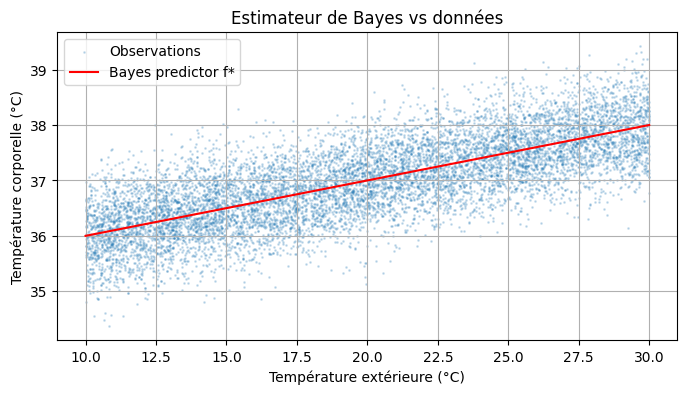

In [8]:
"""
🔹 CELLULE 3 – Visualisation de f* et du nuage de points
"""
x_vis = X[:10_000]
y_vis = Y[:10_000]

plt.figure(figsize=(8, 4))
plt.scatter(x_vis, y_vis, s=1, alpha=0.2, label="Observations")
x_line = np.linspace(10, 30, 100)
plt.plot(x_line, f_star(x_line), color='red', label="Bayes predictor f*")
plt.xlabel("Température extérieure (°C)")
plt.ylabel("Température corporelle (°C)")
plt.legend()
plt.title("Estimateur de Bayes vs données")
plt.grid(True)
plt.show()


In [9]:
"""
🔹 CELLULE 4 – Estimateur naïf = moyenne globale
"""
y_mean = np.mean(Y)

@jit(nopython=True)
def f_naive(x):
    return y_mean


In [12]:
"""
🔹 CELLULE 5 – Risques empiriques pour f* et f_naïf
"""
@jit(nopython=True, parallel=True)
def mse(y_pred, y_true):
    n = y_true.shape[0]
    err = 0.0
    for i in prange(n):
        d = y_pred[i] - y_true[i]
        err += d * d
    return err / n

y_pred_star = f_star(X)
y_pred_naive = np.full_like(Y, y_mean)

risk_star = mse(y_pred_star, Y)
risk_naive = mse(y_pred_naive, Y)

print(f"Risque empirique de l’estimateur de Bayes : {risk_star:.4f}")
print(f"Risque empirique de l’estimateur naïf     : {risk_naive:.4f}")


Risque empirique de l’estimateur de Bayes : 0.2506
Risque empirique de l’estimateur naïf     : 0.5841


In [13]:
"""
🔹 CELLULE 6 – Interprétation finale
"""
gain = risk_naive - risk_star
print(f"Gain de performance (réduction du MSE) : {gain:.4f}")
print(f"Ratio (risk_naive / risk_star)        : {risk_naive / risk_star:.2f}x meilleur")


Gain de performance (réduction du MSE) : 0.3334
Ratio (risk_naive / risk_star)        : 2.33x meilleur
